In [10]:
%help %viz

Usage: %viz [--view=<VIEW>] [--style=<STYLE>...] <NAME> [<NAME>...]

Visualize model elements of <NAME>(s). <NAME>s must be fully qualified.

<VIEW> is case insensitive and possible candidates are:
   DEFAULT		Automatically choose an appropriate view from the given model element names
   TREE			Show a tree-structural view, like a Block Definition Diagram (BDD)
   INTERCONNECTION	Show an interconnection view, like an Internal Block Diagram (IBD)
   STATE		Show state machines
   ACTION		Show actions like an activity diagram
   SEQUENCE		Show events and messages in a sequence diagram
   MIXED		Show multiple views

<STYLE> is also case insensitive. Multiple --style options are allowed.  The possible style names are:
  DEFAULT		Standard B&&W
  STDCOLOR		Standard style with colors
  PLANTUML		PlantUML Style
  TB			Top-to-Bottom orientation
  LR			Left-to-Right orientation
  POLYLINE		Polyline style
  ORTHOLINE		Orthogonal line style
  SHOWLIB		Show elements of the standard libraries
  SHOWIN

In [4]:
package 'Port Example' {
	
	attribute def Temp;
	
	part def Fuel;
	
	port def FuelOutPort {
		attribute temperature : Temp;
		out item fuelSupply : Fuel;
		in item fuelReturn : Fuel;
	}
	
	port def FuelInPort {
		attribute temperature : Temp;
		in item fuelSupply : Fuel;
		out item fuelReturn : Fuel;
	}
	
	part def FuelTankAssembly {
		port fuelTankPort : FuelOutPort;
	}
	
	part def Engine {
		port engineFuelPort : FuelInPort;
	}
}

Package Port Example (63c1a305-ee3f-4a5a-a014-08829c9d04ca)


In [12]:
package Flow_Connection_Definition_Example {
	private import 'Port Example'::*;
	
	part def Vehicle;
	
	flow def FuelFlow {
		ref :>> payload : Fuel;
		end port supplierPort : FuelOutPort;
		end port consumerPort : FuelInPort;
	}
	
	part vehicle : Vehicle {
		part tankAssy : FuelTankAssembly;
		part eng : Engine;
		
		flow : FuelFlow
		  from tankAssy.fuelTankPort.fuelSupply
			to eng.engineFuelPort.fuelSupply;
			
	} 
}

Package Flow_Connection_Definition_Example (46a0e8ae-e681-4ca0-b526-a2d617bdca03)


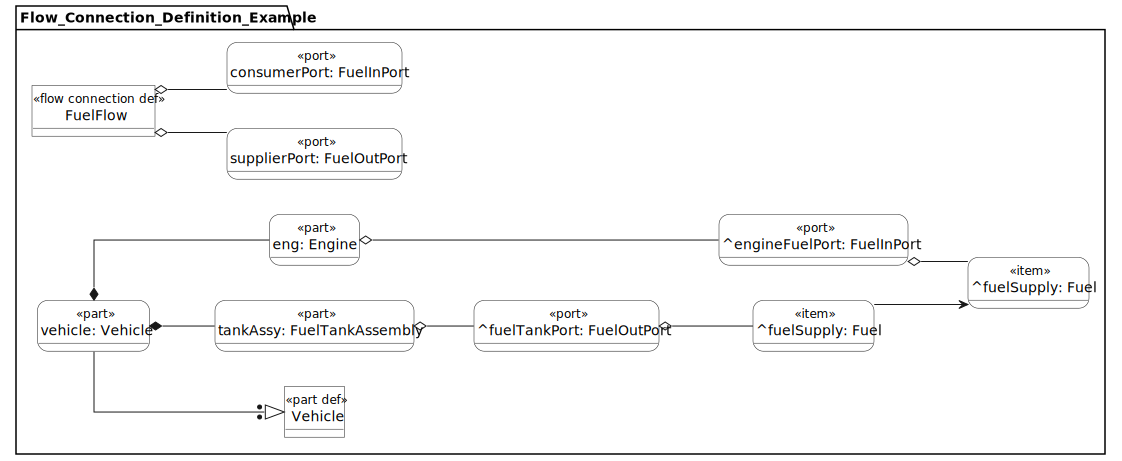

In [14]:
%viz --view Tree --style=LR --style=ortholine Flow_Connection_Definition_Example

In [17]:
package Flow_Connection_Interface_Example {
	private import 'Port Example'::*;
	
	part def Vehicle;
	
	interface def FuelInterface {
		end supplierPort : FuelOutPort;
		end consumerPort : FuelInPort;
		
		flow supplierPort.fuelSupply to consumerPort.fuelSupply;			
		flow consumerPort.fuelReturn to supplierPort.fuelReturn;
	}
	
	part vehicle : Vehicle {	
		part tankAssy : FuelTankAssembly;		
		part eng : Engine;
		
		interface : FuelInterface connect 
			supplierPort ::> tankAssy.fuelTankPort to 
			consumerPort ::> eng.engineFuelPort;
	} 
}

Package Flow_Connection_Interface_Example (bc0ad4d6-86e0-4866-bdbe-27d395aade10)


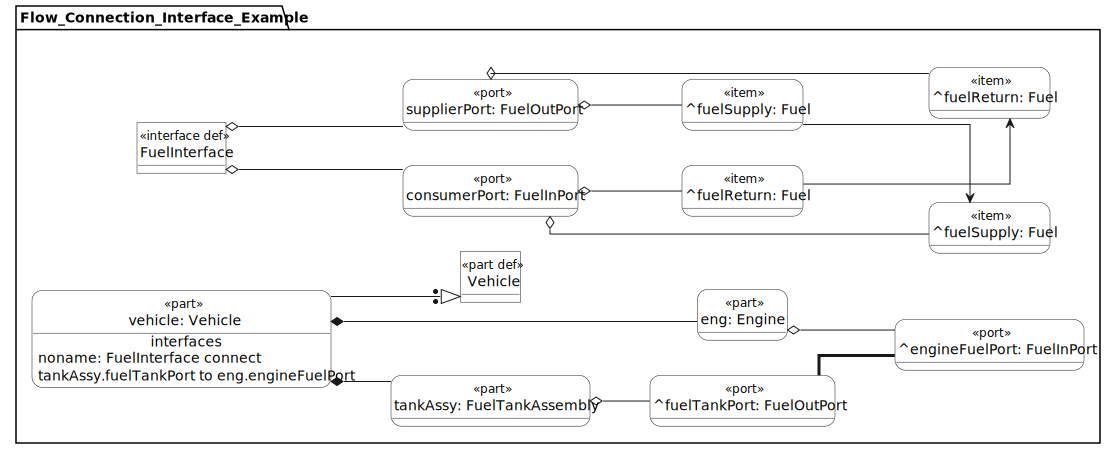

In [19]:
%viz --view Tree --style=LR --style=ortholine Flow_Connection_Interface_Example

In [22]:
package Flow_Connection_Interface_Example {
	private import 'Port Example'::*;
	
	part def Vehicle;
	
	part vehicle : Vehicle {
		part tankAssy : FuelTankAssembly;
		part eng : Engine;
		
		flow of Fuel
		  from tankAssy.fuelTankPort.fuelSupply
			to eng.engineFuelPort.fuelSupply;
			
		flow of Fuel
		  from eng.engineFuelPort.fuelReturn
			to tankAssy.fuelTankPort.fuelReturn;
	} 
}

Package Flow_Connection_Interface_Example (d7ba6b00-1730-4007-8d9d-9c397a41517d)


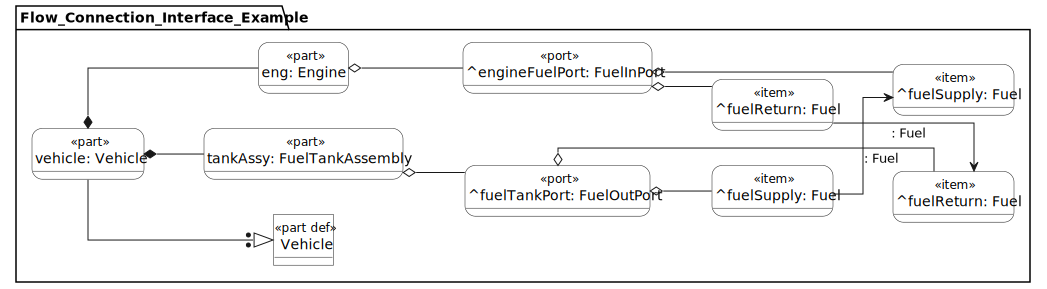

In [24]:
%viz --view Tree --style=LR --style=ortholine Flow_Connection_Interface_Example